#objective:                
The objective of the dataset is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

# Step 0: Import libraries and Dataset

In [64]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Importing dataset
df = pd.read_csv('/diabetes (1).csv')

In [65]:
pip install streamlit


# Step 1: Descriptive Statistics

In [66]:
# Preview data
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [67]:
# Dataset dimensions - (rows, columns)
df.shape

(768, 9)

In [68]:
# Features data-type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [69]:
# Statistical summary
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [70]:
#data cleaning
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Observations:
1. There are a total of 768 records and 9 features in the dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

##STEP 2:EDA (explanatory data analysis)

In [71]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [74]:
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [75]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [76]:
df.shape

(768, 9)

In [77]:
value_counts = df['Age'].value_counts()

print(value_counts)

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: Age, dtype: int64


## Observations:
1. There are a total of 768 records and 9 features in the dataset.
2. Each feature can be either of integer or float dataype.
3. Some features like Glucose, Blood pressure , Insulin, BMI have zero values which represent missing data.
4. There are zero NaN values in the dataset.
5. In the outcome column, 1 represents diabetes positive and 0 represents diabetes negative.

# Step 2: Data Visualization

<Axes: xlabel='Outcome', ylabel='count'>

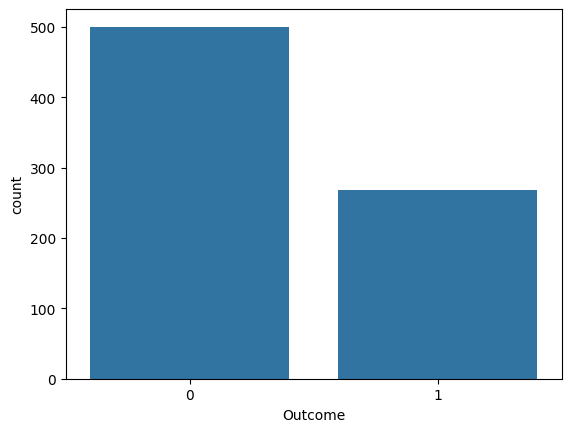

In [78]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = df)

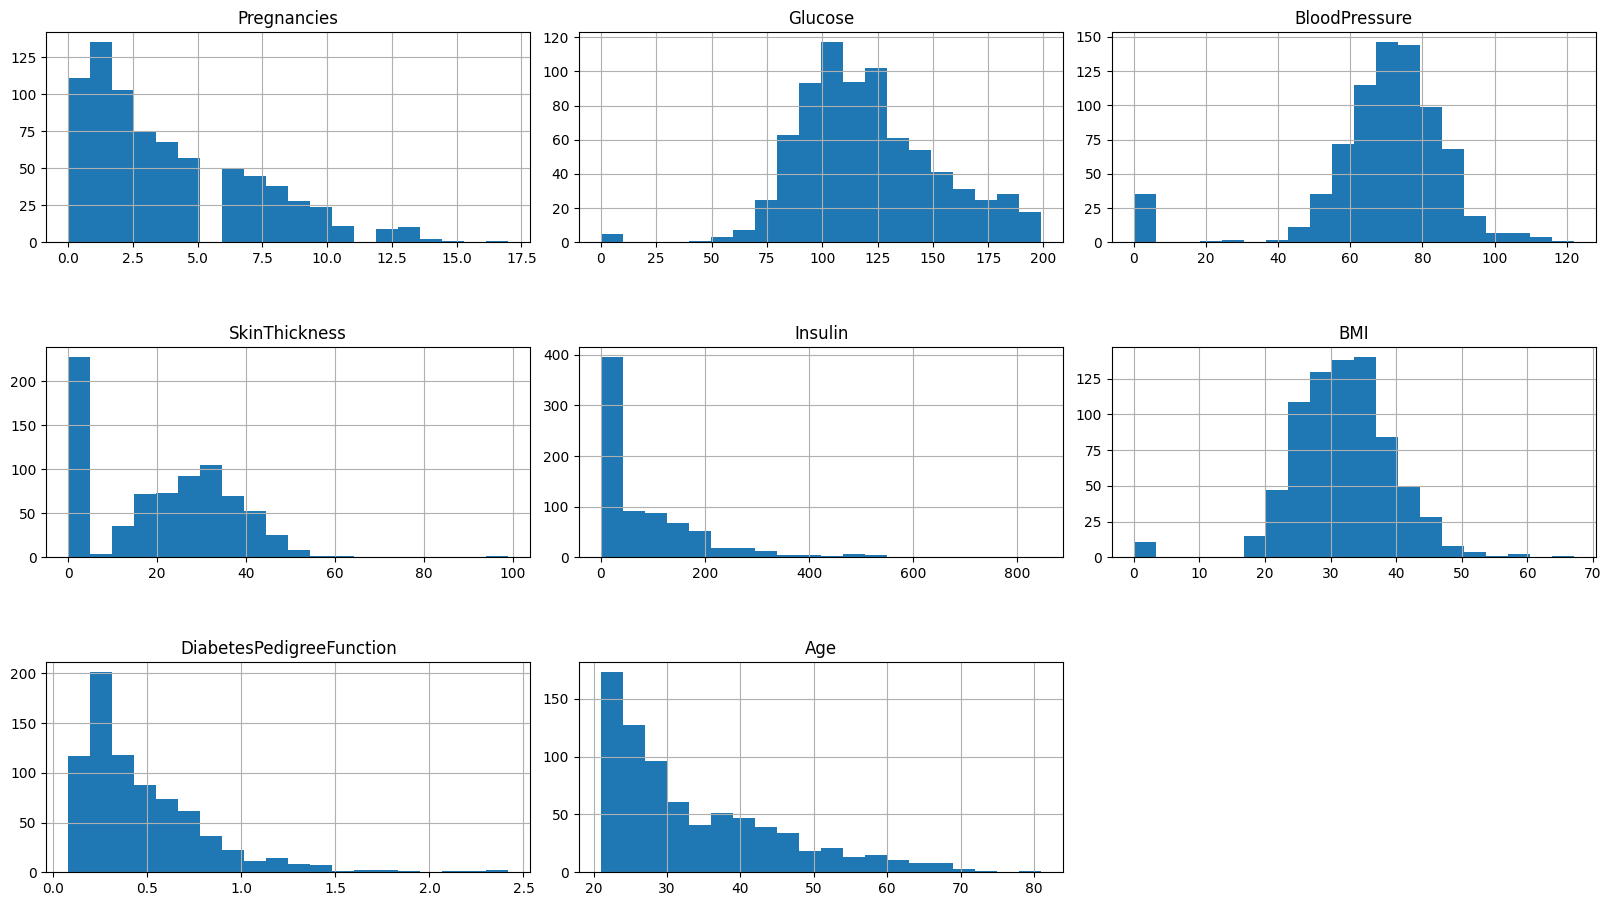

In [79]:
# Histogram of each feature
import itertools

col = df.columns[:8]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
  plt.subplot(int(length/2), 3, j + 1)
  plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
  df[i].hist(bins = 20)
  plt.title(i)
plt.show()

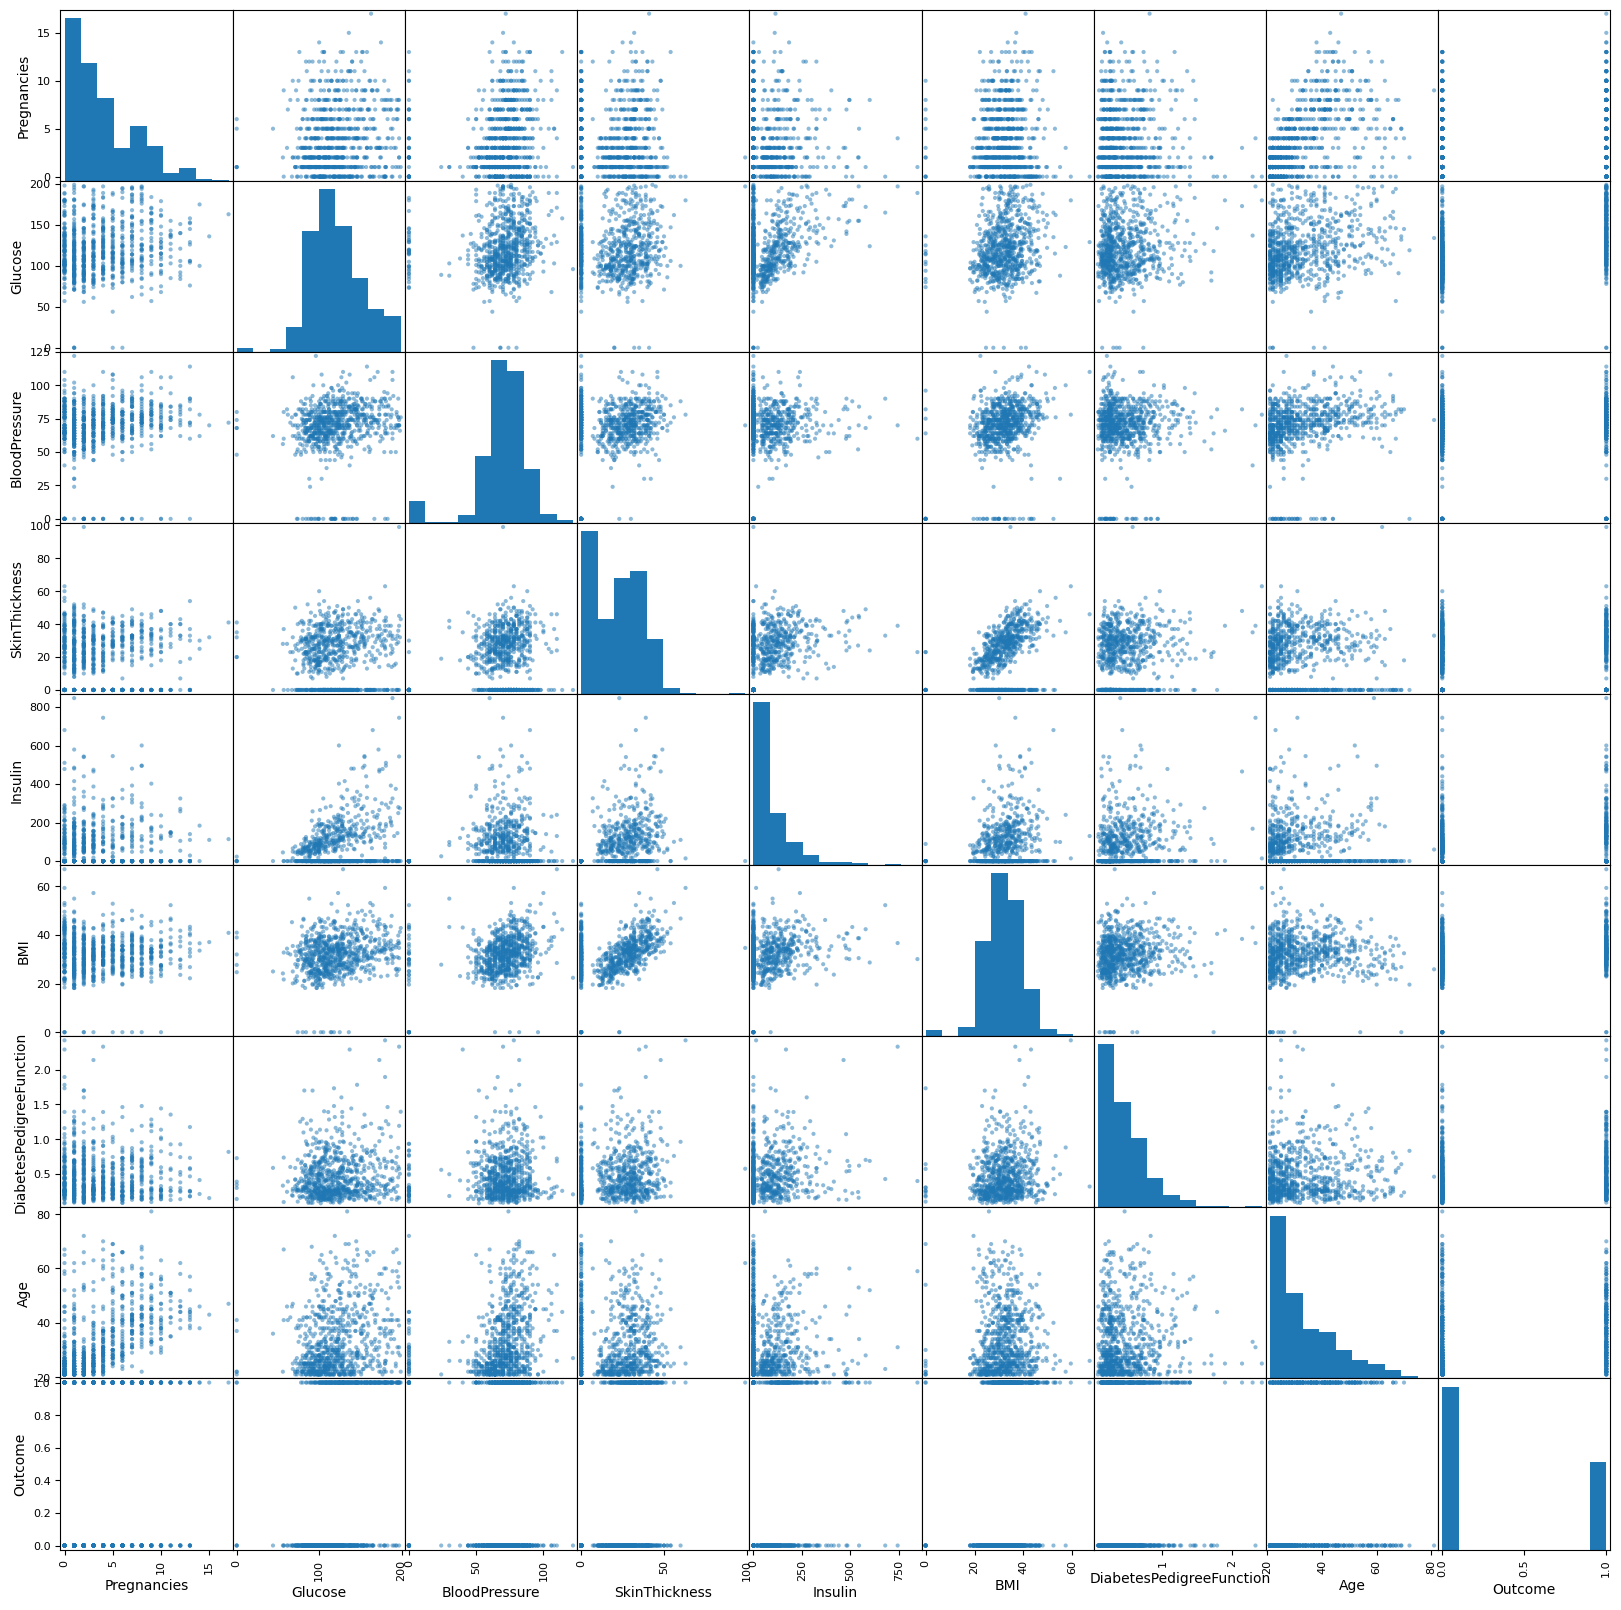

In [80]:
# Scatter plot matrix
import pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20, 20));

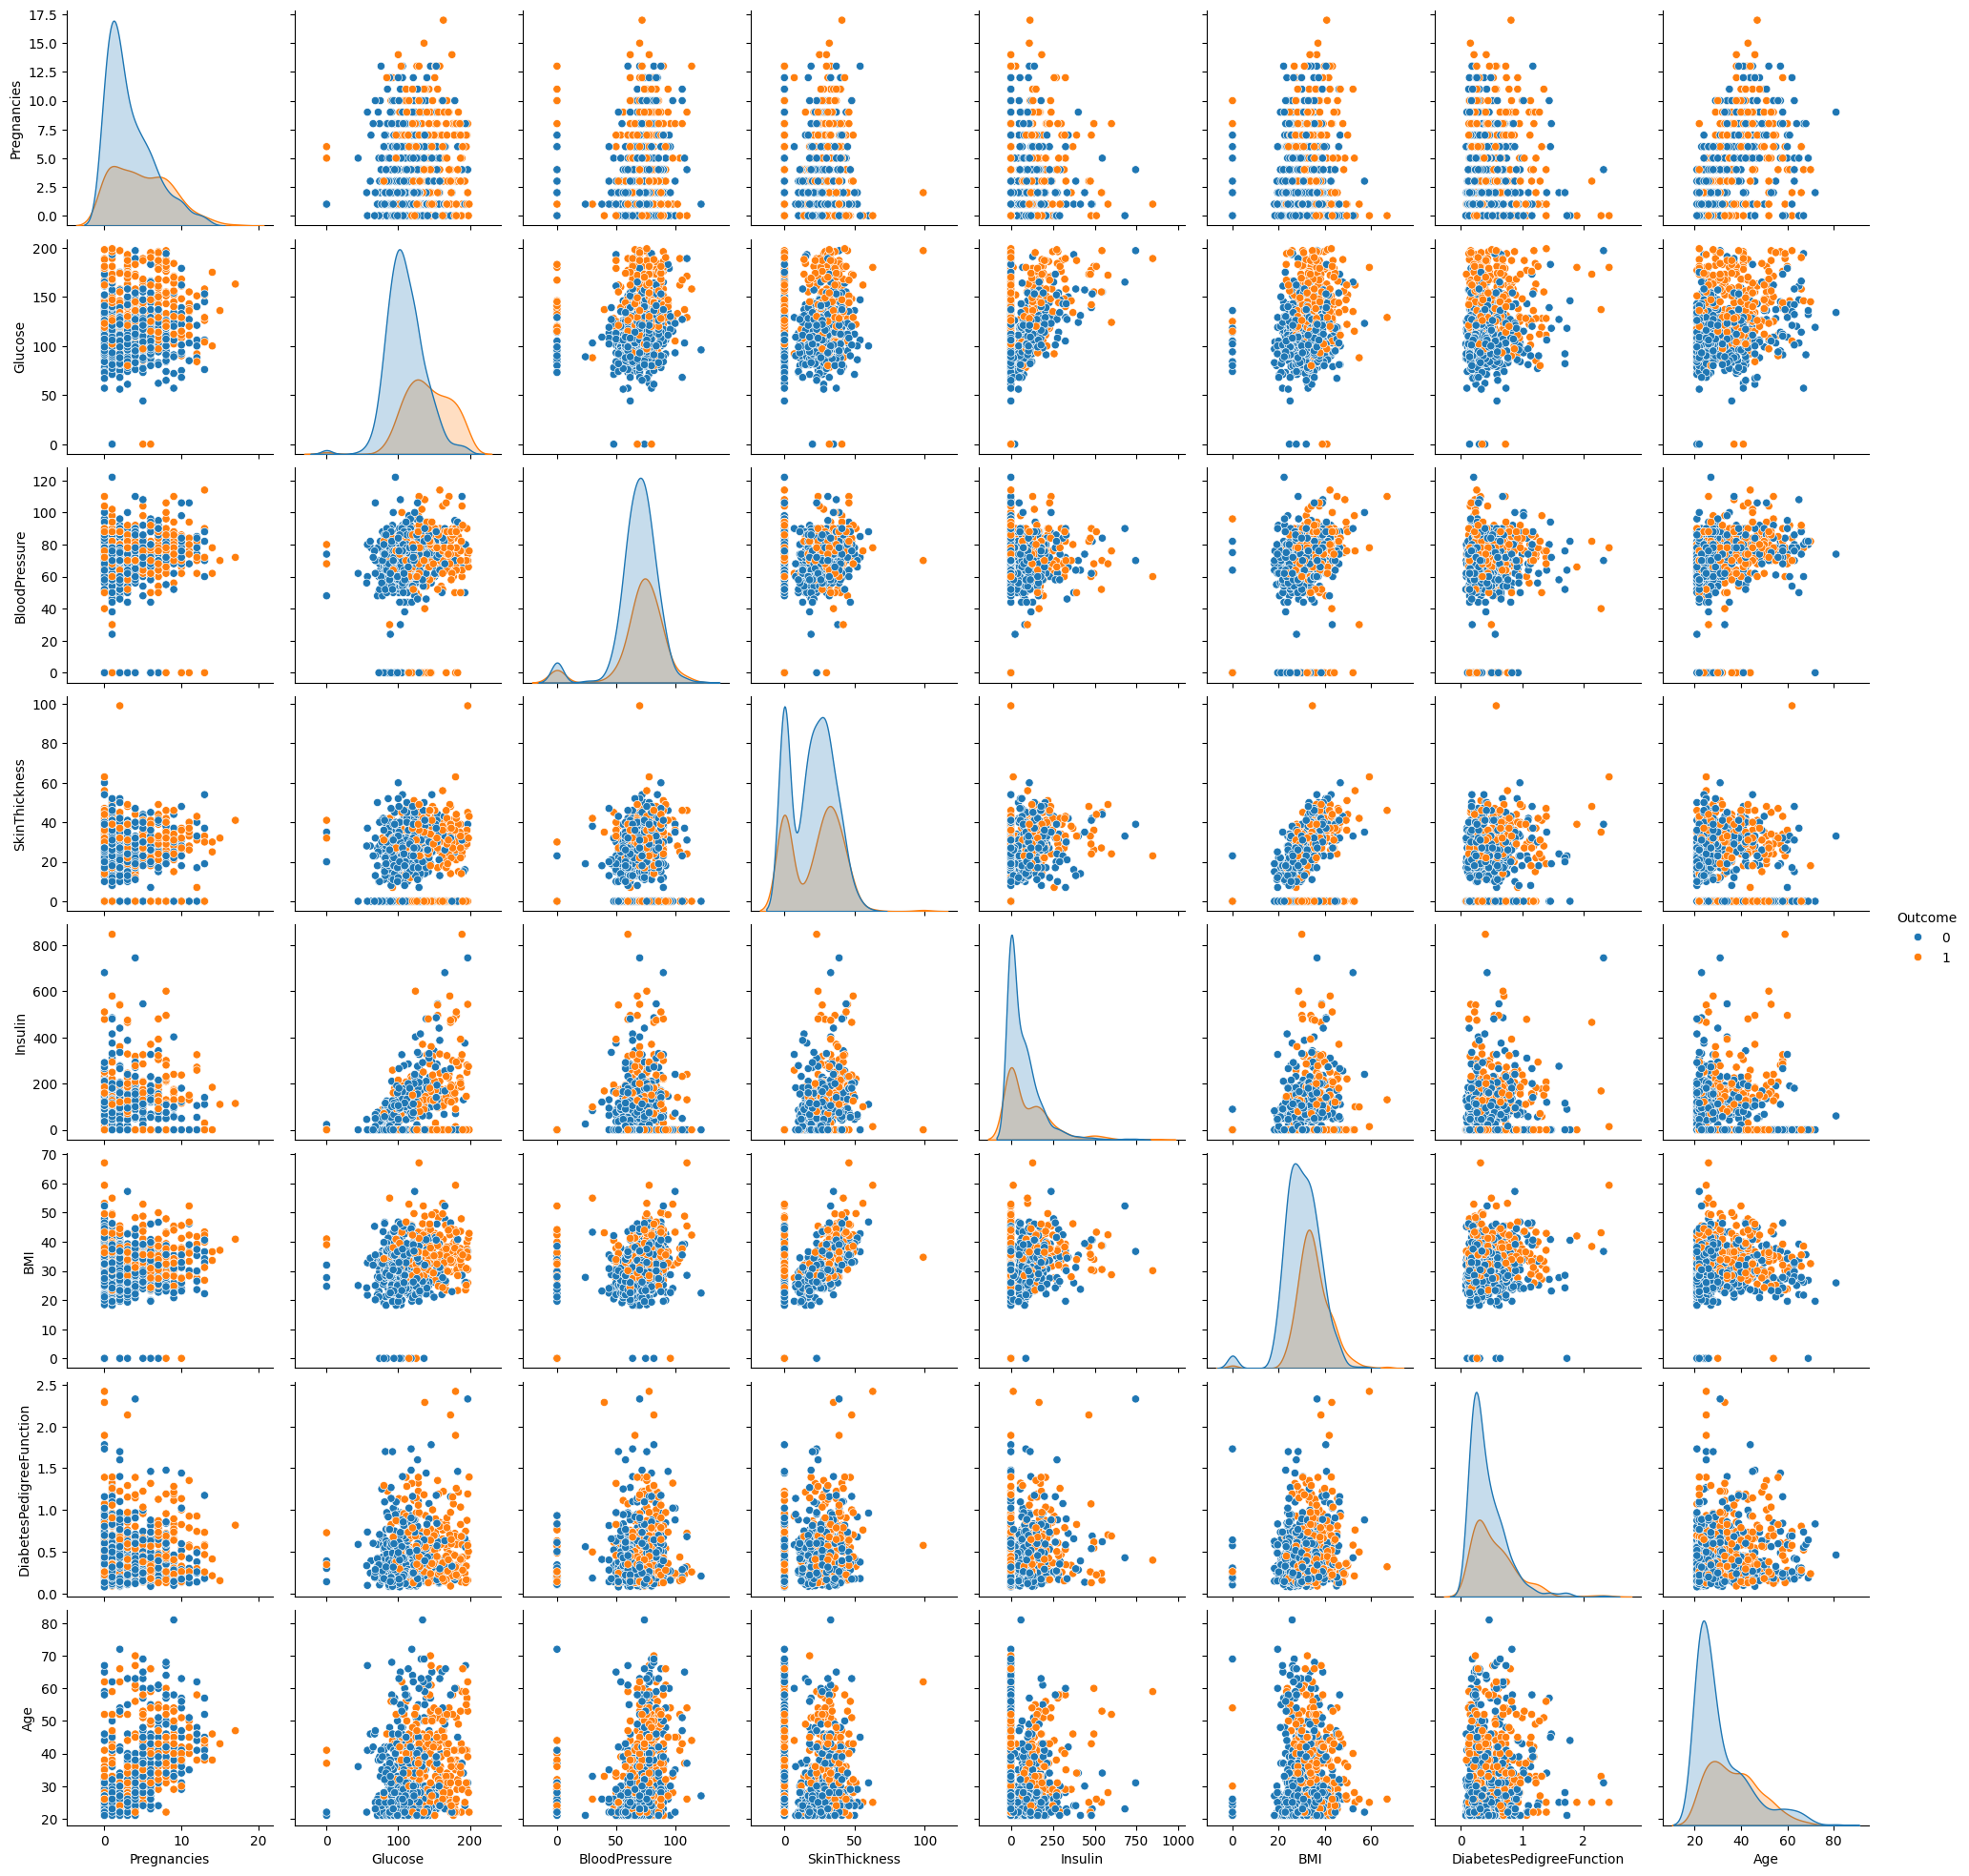

In [81]:
# Pairplot
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

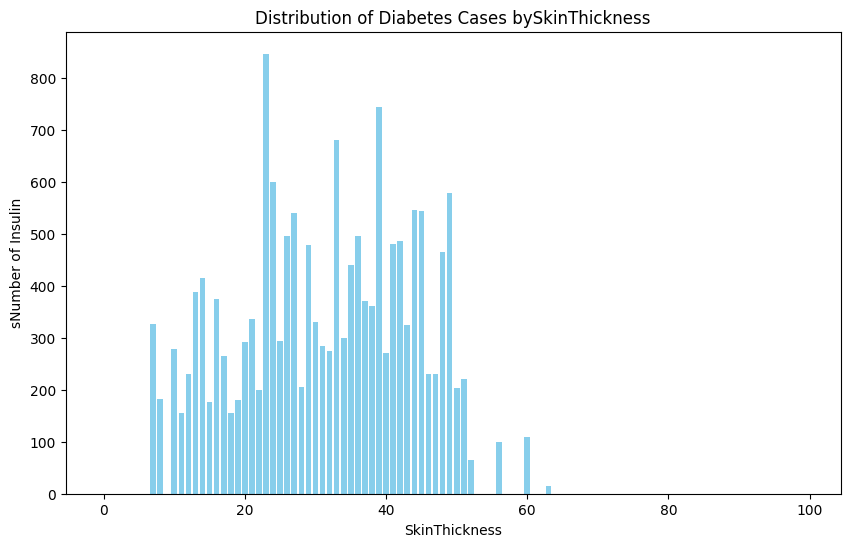

In [82]:
plt.figure(figsize=(10, 6))
plt.bar(df['SkinThickness'], df['Insulin'], color='skyblue')
plt.xlabel('SkinThickness')
plt.ylabel('sNumber of Insulin')
plt.title('Distribution of Diabetes Cases bySkinThickness')
plt.show()


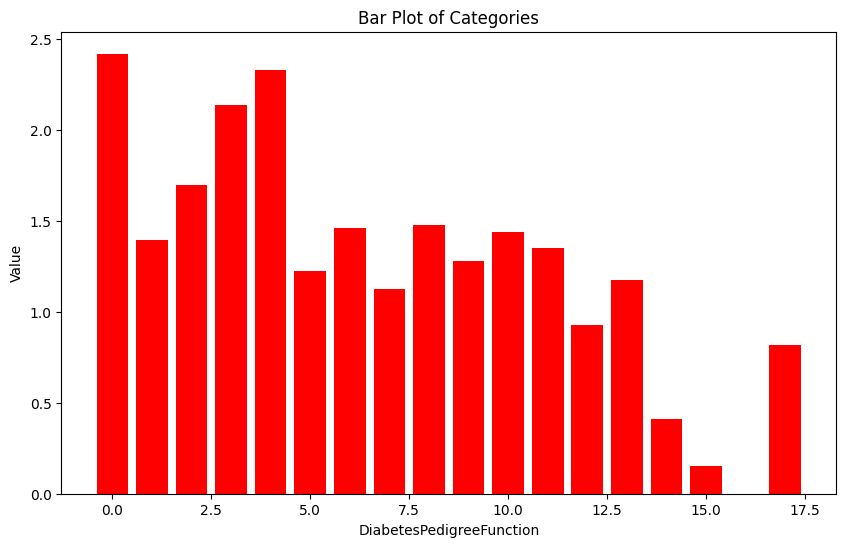

In [83]:
plt.figure(figsize=(10, 6))
plt.bar(df['Pregnancies'], df['DiabetesPedigreeFunction'], color='red')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Value')
plt.title('Bar Plot of Categories')
plt.show()


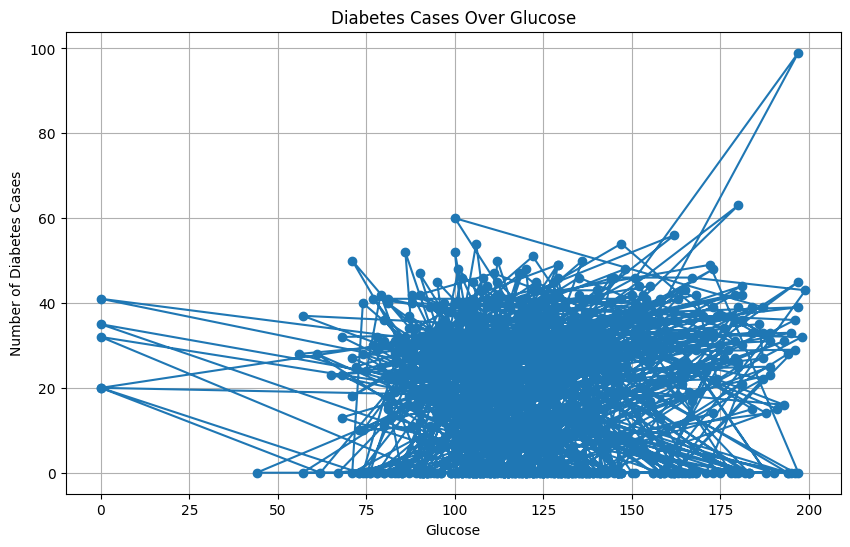

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(df['Glucose'], df['SkinThickness'], marker='o')
plt.xlabel('Glucose')
plt.ylabel('Number of Diabetes Cases')
plt.title('Diabetes Cases Over Glucose')
plt.grid(True)
plt.show()


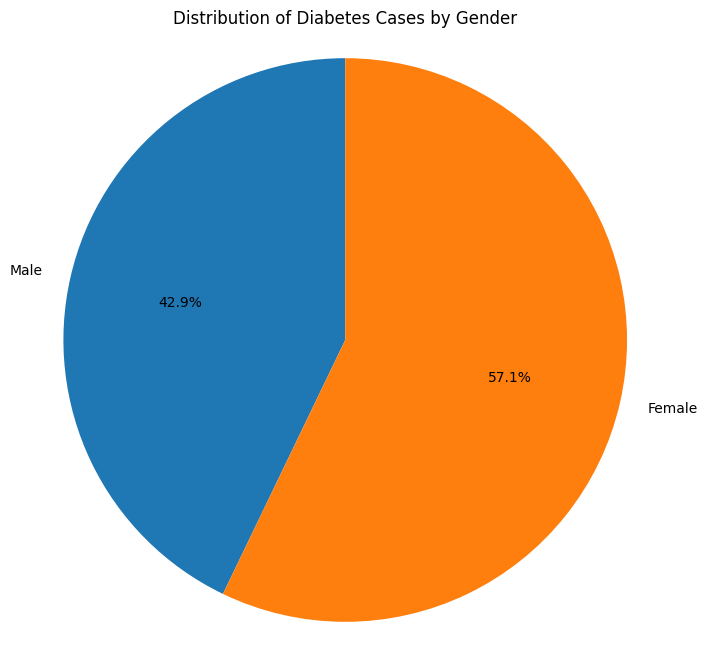

In [85]:
labels = ['Male', 'Female']
sizes = [30, 40]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Diabetes Cases by Gender')
plt.show()


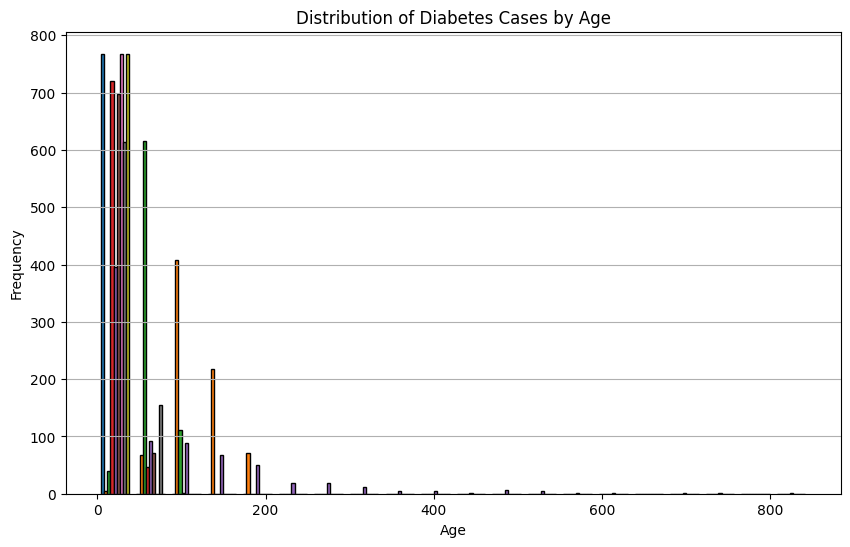

In [86]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
plt.hist(df, bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Diabetes Cases by Age')
plt.grid(axis='y')
plt.show()


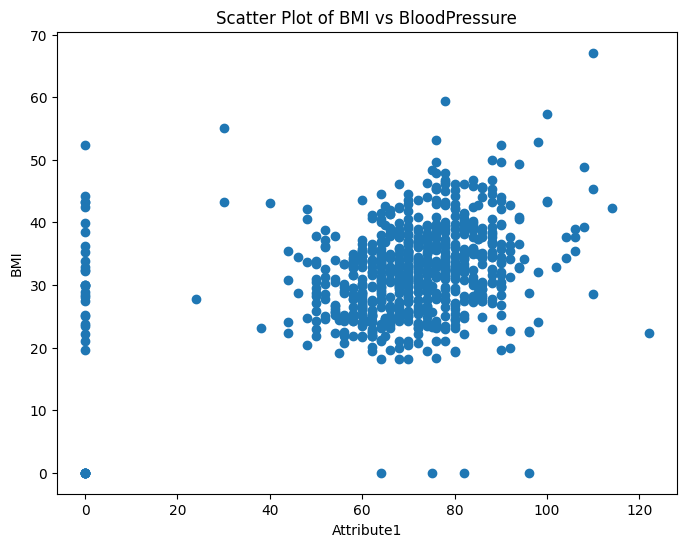

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(df['BloodPressure'], df['BMI'])
plt.xlabel('Attribute1')
plt.ylabel('BMI')
plt.title('Scatter Plot of BMI vs BloodPressure')
plt.show()


<Figure size 800x600 with 0 Axes>

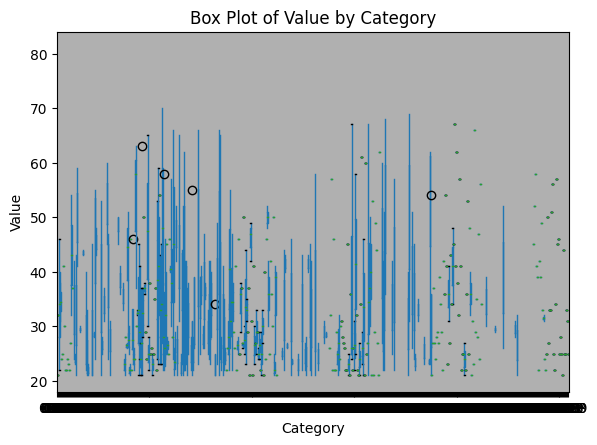

In [88]:
plt.figure(figsize=(8, 6))
df.boxplot(by='DiabetesPedigreeFunction', column='Age')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Box Plot of Value by Category')
plt.suptitle('')
plt.show()


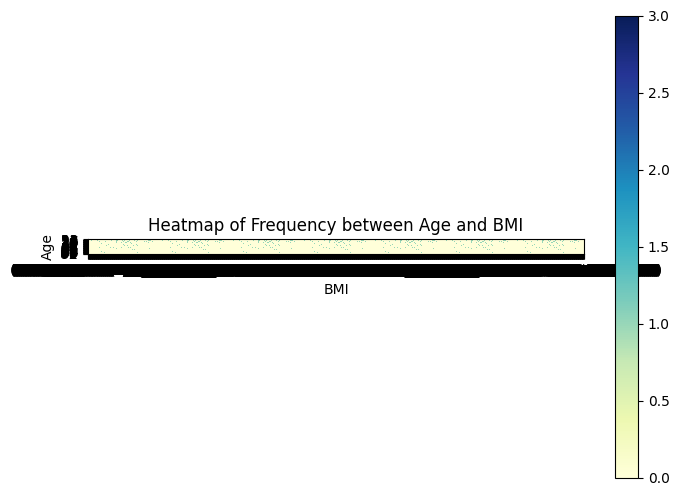

In [89]:
#pivot heatmap
pivot_table = df.pivot_table(index='Age', columns='BMI', aggfunc=len, fill_value=0)


plt.figure(figsize=(8, 6))
plt.imshow(pivot_table, cmap='YlGnBu', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('Heatmap of Frequency between Age and BMI')
plt.show()


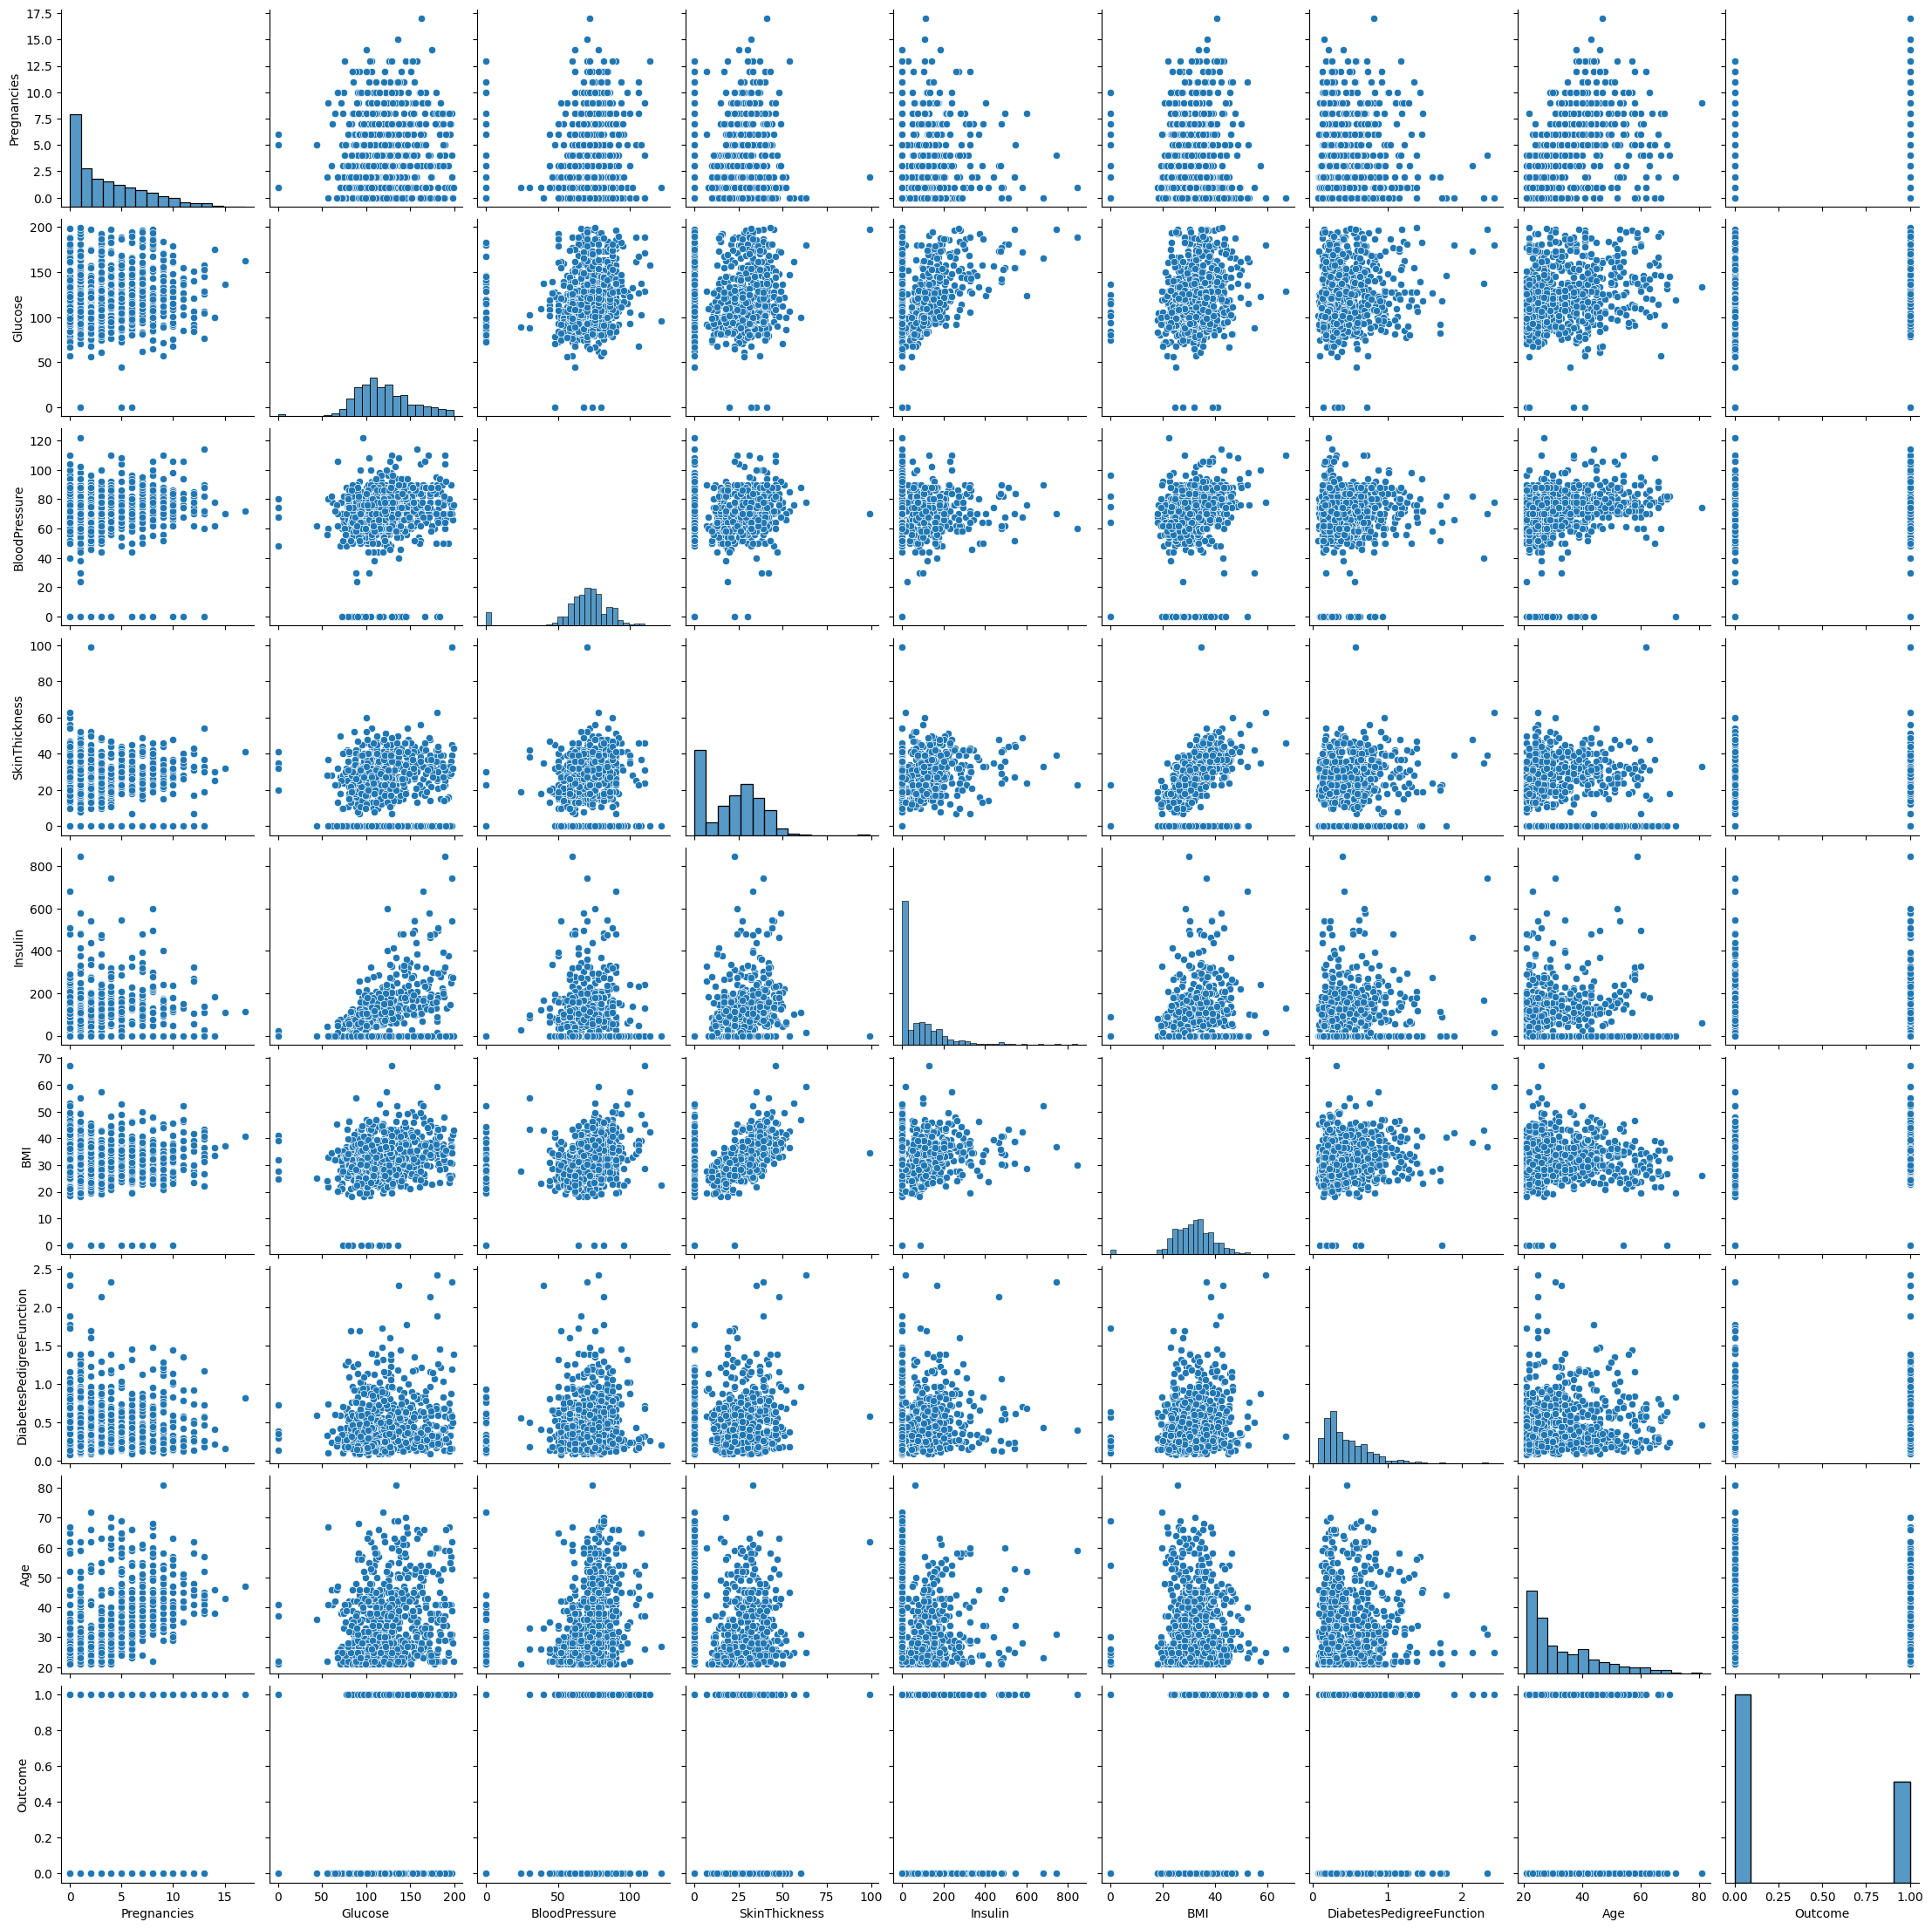

In [90]:
sns.pairplot(data=df)
plt.show()

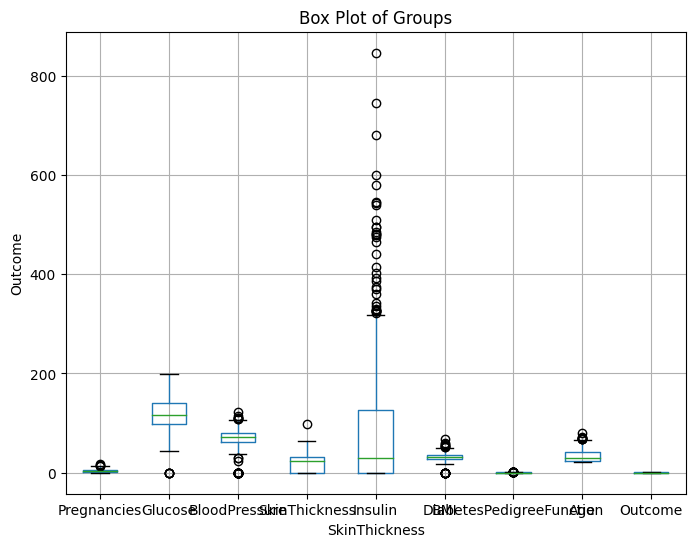

In [91]:
#boxplot graph
plt.figure(figsize=(8, 6))

df.boxplot()
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
plt.title('Box Plot of Groups')
plt.show()


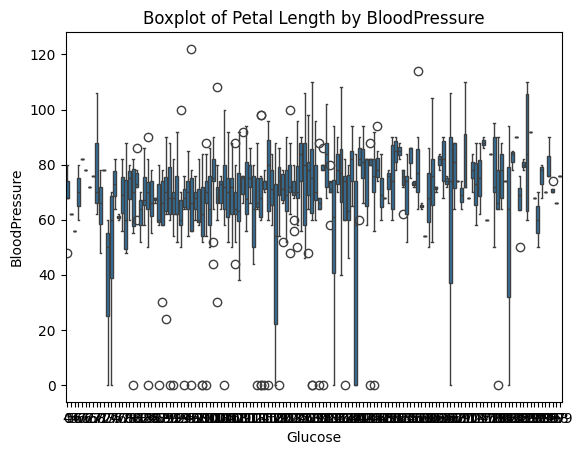

In [92]:
sns.boxplot(x='Glucose', y ='BloodPressure', data=df)
plt.title('Boxplot of Petal Length by BloodPressure')
plt.show()

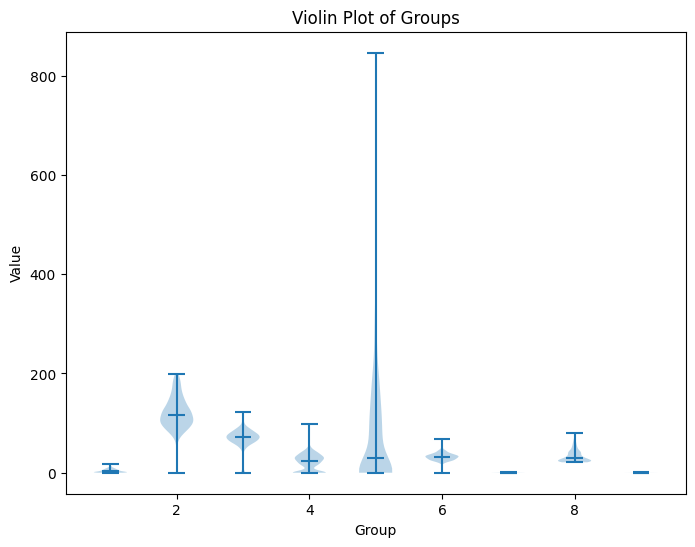

In [93]:
#violin plot
plt.figure(figsize=(8, 6))
plt.violinplot(df.values, showmeans=False, showmedians=True)

plt.xlabel('Group')
plt.ylabel('Value')
plt.title('Violin Plot of Groups')
plt.show()


<Figure size 800x600 with 0 Axes>

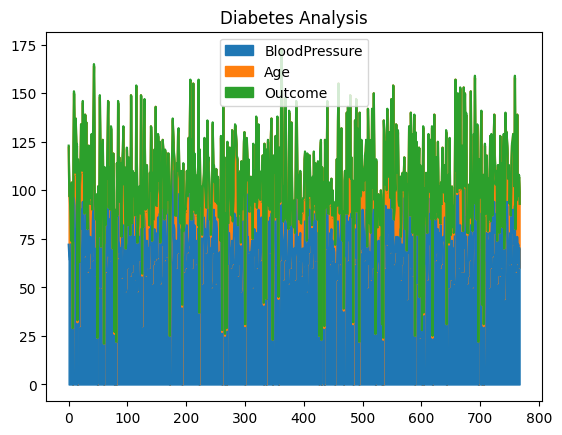

In [94]:
plt.figure(figsize=(8,6))
df[['BloodPressure','Age','Outcome']].plot(kind='area')
plt.title("Diabetes Analysis")
plt.show()

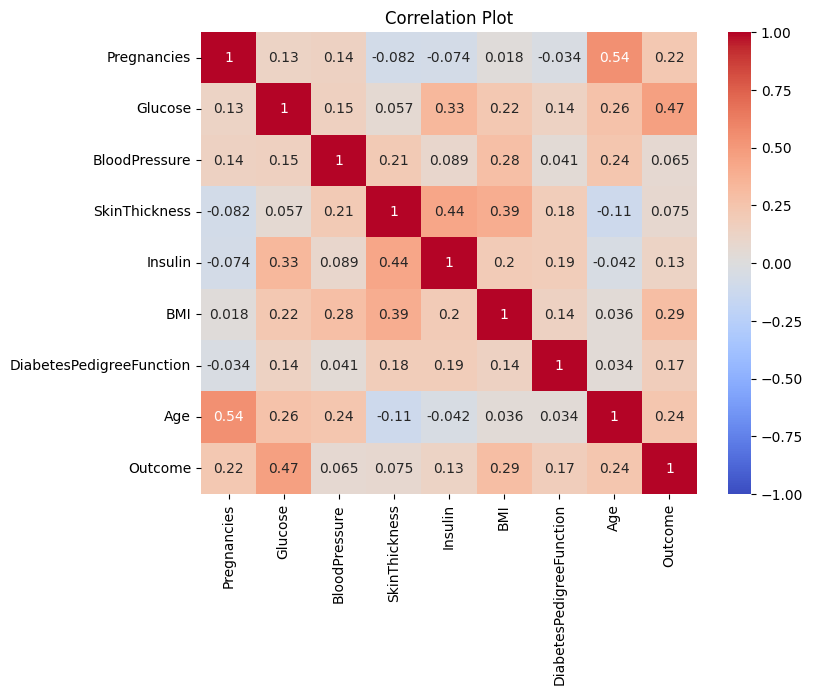

In [95]:
#heatmap
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Plot')
plt.show()


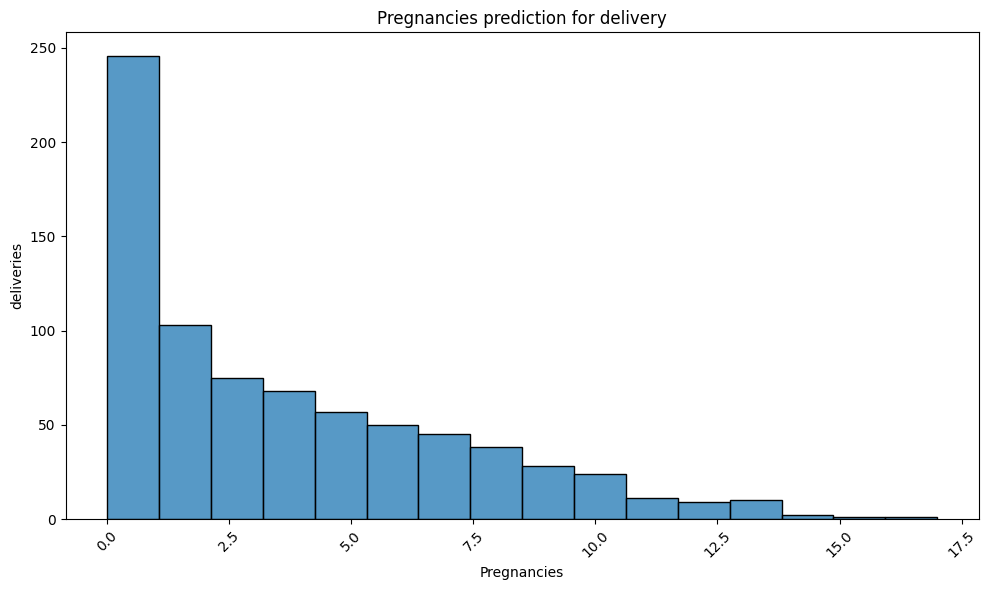

In [96]:
#histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Pregnancies'],linestyle='-')
plt.title('Pregnancies prediction for delivery')
plt.xlabel('Pregnancies')
plt.ylabel('deliveries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

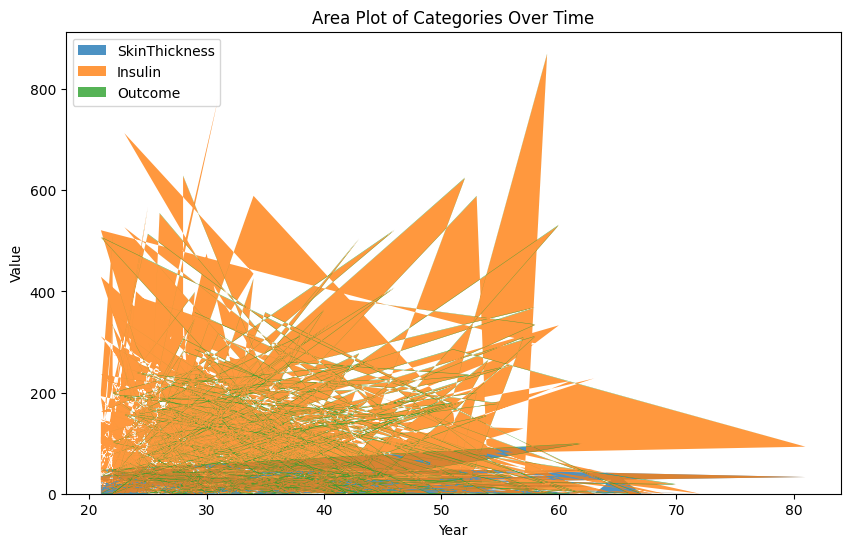

In [97]:
plt.figure(figsize=(10, 6))
plt.stackplot(df['Age'], df['SkinThickness'], df['Insulin'], df['Outcome'],
              labels=['SkinThickness', 'Insulin', 'Outcome'], alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Area Plot of Categories Over Time')
plt.legend(loc='upper left')
plt.show()


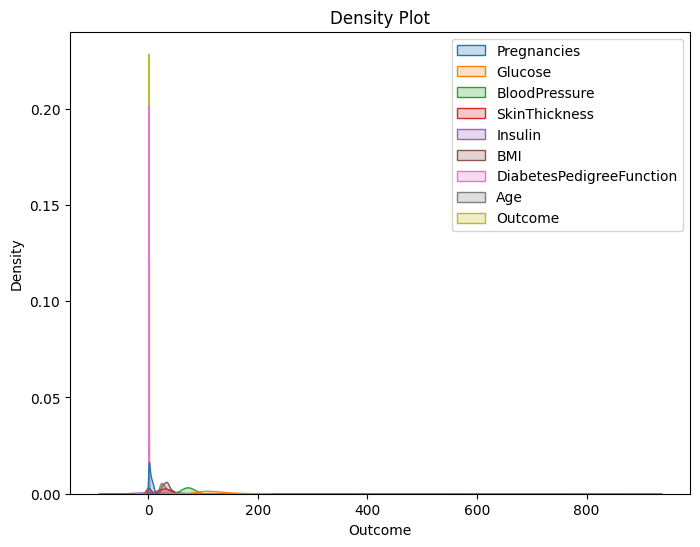

In [98]:
#density plot
plt.figure(figsize=(8, 6))
sns.kdeplot(df, shade=True)
plt.xlabel('Outcome')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()


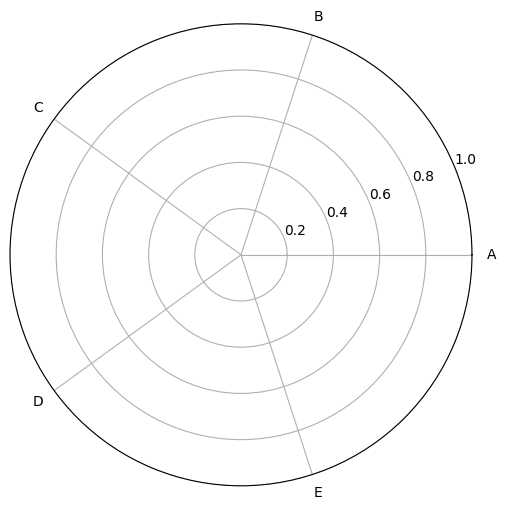

In [99]:
#pie plot
labels = ['A', 'B', 'C', 'D', 'E']
values = df
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
plt.xticks(angles[:-1], labels)
plt.show()


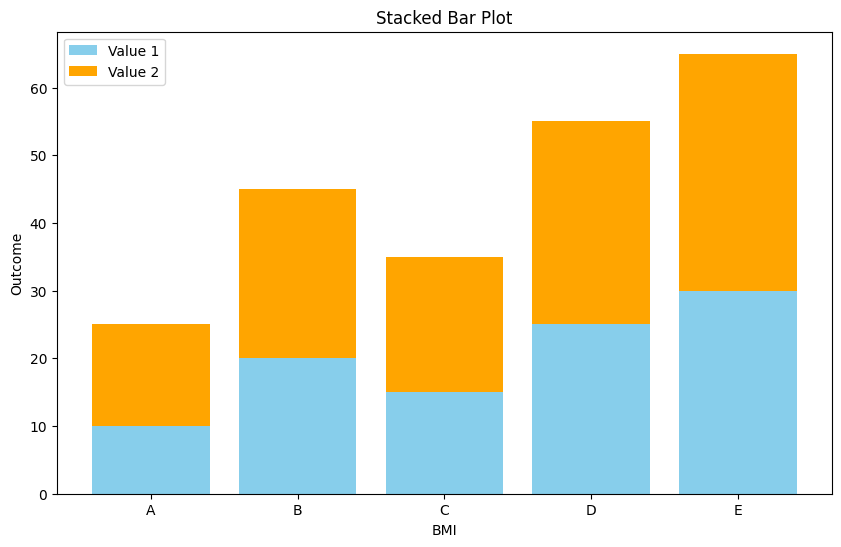

In [100]:
#stacked bar plot
import matplotlib.pyplot as plt
import numpy as np
categories = ['A', 'B', 'C', 'D', 'E']
values1 = [10, 20, 15, 25, 30]
values2 = [15, 25, 20, 30, 35]

fig, ax = plt.subplots(figsize=(10, 6))

bar1 = ax.bar(categories, values1, label='Value 1', color='skyblue')
bar2 = ax.bar(categories, values2, bottom=values1, label='Value 2', color='orange')

ax.set_xlabel('BMI')
ax.set_ylabel('Outcome')
ax.set_title('Stacked Bar Plot')
ax.legend()
plt.show()


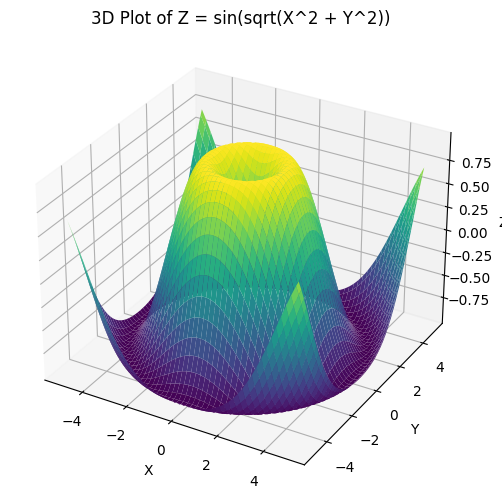

In [101]:
#3d plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of Z = sin(sqrt(X^2 + Y^2))')

plt.show()


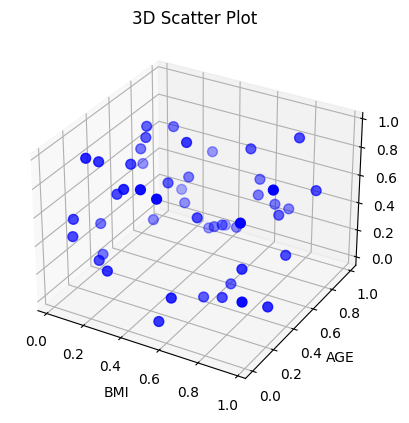

In [102]:
#3d scatter plot
import numpy as np

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D





np.random.seed(42)

x = np.random.rand(50)

y = np.random.rand(50)

z = np.random.rand(50)




fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='blue', s=50)



ax.set_xlabel('BMI')

ax.set_ylabel('AGE')

ax.set_zlabel('Insulin')






plt.title('3D Scatter Plot')

plt.show()

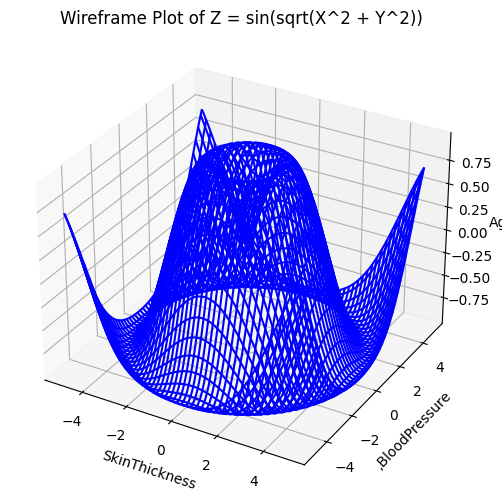

In [103]:
#wireframe plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = np.sin(np.sqrt(x**2 + y**2))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, color='blue')
ax.set_xlabel('SkinThickness')
ax.set_ylabel(',BloodPressure')
ax.set_zlabel('Age')
ax.set_title('Wireframe Plot of Z = sin(sqrt(X^2 + Y^2))')
plt.show()


# Step 3: Data Preprocessing

In [186]:
dataset_new = pd.read_csv('/diabetes (1).csv')

In [187]:
# Replacing zero values with NaN
dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset_new[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)
dataset_new.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [188]:
# Count of NaN
dataset_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [189]:
dataset_new= dataset_new.T.fillna(dataset_new.mean(axis=1)).T.dropna()

In [190]:
# Statistical summary
dataset_new.describe().T

count        mean         std        min        25%  \
Pregnancies               768.0    3.845052    3.369578   0.000000   1.000000   
Glucose                   768.0  121.045838   31.452211  16.548571  99.000000   
BloodPressure             768.0   70.498789   14.976532  19.620400  62.000000   
SkinThickness             768.0   31.768437   10.385478   7.000000  24.913821   
Insulin                   768.0   97.898960  103.718088  14.000000  36.747080   
BMI                       768.0   32.436729    6.975771  18.200000  27.400000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078000   0.243750   
Age                       768.0   33.240885   11.760232  21.000000  24.000000   
Outcome                   768.0    0.348958    0.476951   0.000000   0.000000   

                                 50%        75%     max  
Pregnancies                 3.000000    6.00000   17.00  
Glucose                   117.000000  140.25000  199.00  
BloodPressure              72.000000   80.00000  122.00  
SkinThickness              32.000000   39.00000   99.00  
Insulin                    48.073357  127.25000  846.00  
BMI                        32.150000   36.60000   67.10  
DiabetesPedigreeFunction    0.372500    0.62625    2.42  
Age                        29.000000   41.00000   81.00  
Outcome                     0.000000    1.00000    1.00

In [191]:
# Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)

In [192]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [193]:
# Selecting features - [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [194]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = dataset_new['Outcome'] )

In [195]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (614, 4)
X_test shape: (154, 4)
Y_train shape: (614,)
Y_test shape: (154,)


# Step 4: Data Modelling

In [196]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

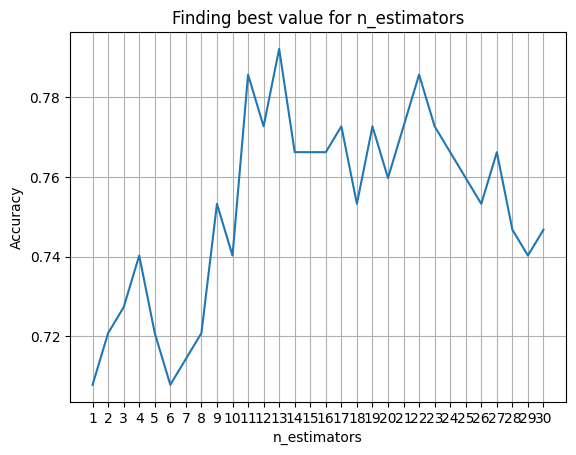

Highest value:  0.7922077922077922


In [197]:
# Plotting a graph for n_neighbors
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X_axis = list(range(1, 31))
acc = pd.Series()
x = range(1,31)

for i in list(range(1, 31)):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, Y_train)
    prediction = knn_model.predict(X_test)
    acc = acc.append(pd.Series(metrics.accuracy_score(prediction, Y_test)))
plt.plot(X_axis, acc)
plt.xticks(x)
plt.title("Finding best value for n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.grid()
plt.show()
print('Highest value: ',acc.values.max())

In [198]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=24)

In [199]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [200]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [201]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [202]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=11, random_state=42)

In [203]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

# Step 5: Model Evaluation

In [205]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [206]:
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 72.07792207792207
K Nearest neighbors: 76.62337662337663
Support Vector Classifier: 74.02597402597402
Naive Bayes: 69.48051948051948
Decision tree: 73.37662337662337
Random Forest: 75.32467532467533


In [207]:
#From the above comparison, we can observe that K Nearest neighbors gets the highest accuracy of 76.62 %

In [208]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_knn)
cm

array([[88, 12],
       [24, 30]])

<Axes: >

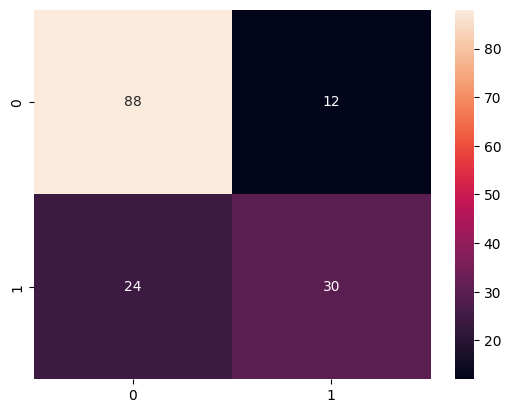

In [209]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True)

In [210]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       100
         1.0       0.71      0.56      0.63        54

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154



#THANK YOU!
##PROJECT BY: KATHIR,SUJANA,ISHANYA,RAMASUBBU